In [19]:
import pandas as pd 

# Reading Data (Volume & date)
df = pd.read_csv("data/AMD.csv")
df = df[df['date'] >= '2018-01-01']
df.head(-5)


,date,volume,open,high,low,close,adjclose
0,2020-07-02,29048300,53.029999,53.189999,52.049999,52.340000,52.340000
1,2020-07-01,32370900,52.630001,52.869999,51.599998,52.580002,52.580002
2,2020-06-30,42275700,51.160000,52.770000,50.820000,52.610001,52.610001
3,2020-06-29,49905800,50.150002,50.279999,48.419998,50.279999,50.279999
4,2020-06-26,65485700,51.849998,51.950001,49.450001,50.099998,50.099998
...,...,...,...,...,...,...,...
620,2018-01-16,42686600,12.050000,12.200000,11.800000,11.910000,11.910000
621,2018-01-12,47149300,11.820000,12.070000,11.800000,12.020000,12.020000
622,2018-01-11,38354900,12.070000,12.190000,11.900000,12.140000,12.140000
623,2018-01-10,52561200,11.630000,12.150000,11.560000,11.960000,11.960000


In [20]:
# Priliminary Data Analytics
df['volume'].describe()

count    6.300000e+02
mean     7.411997e+07
std      3.759600e+07
min      1.760990e+07
25%      4.776520e+07
50%      6.455435e+07
75%      8.802268e+07
max      3.250584e+08
Name: volume, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


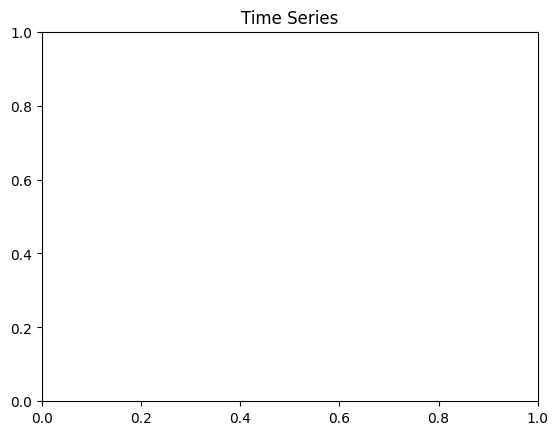

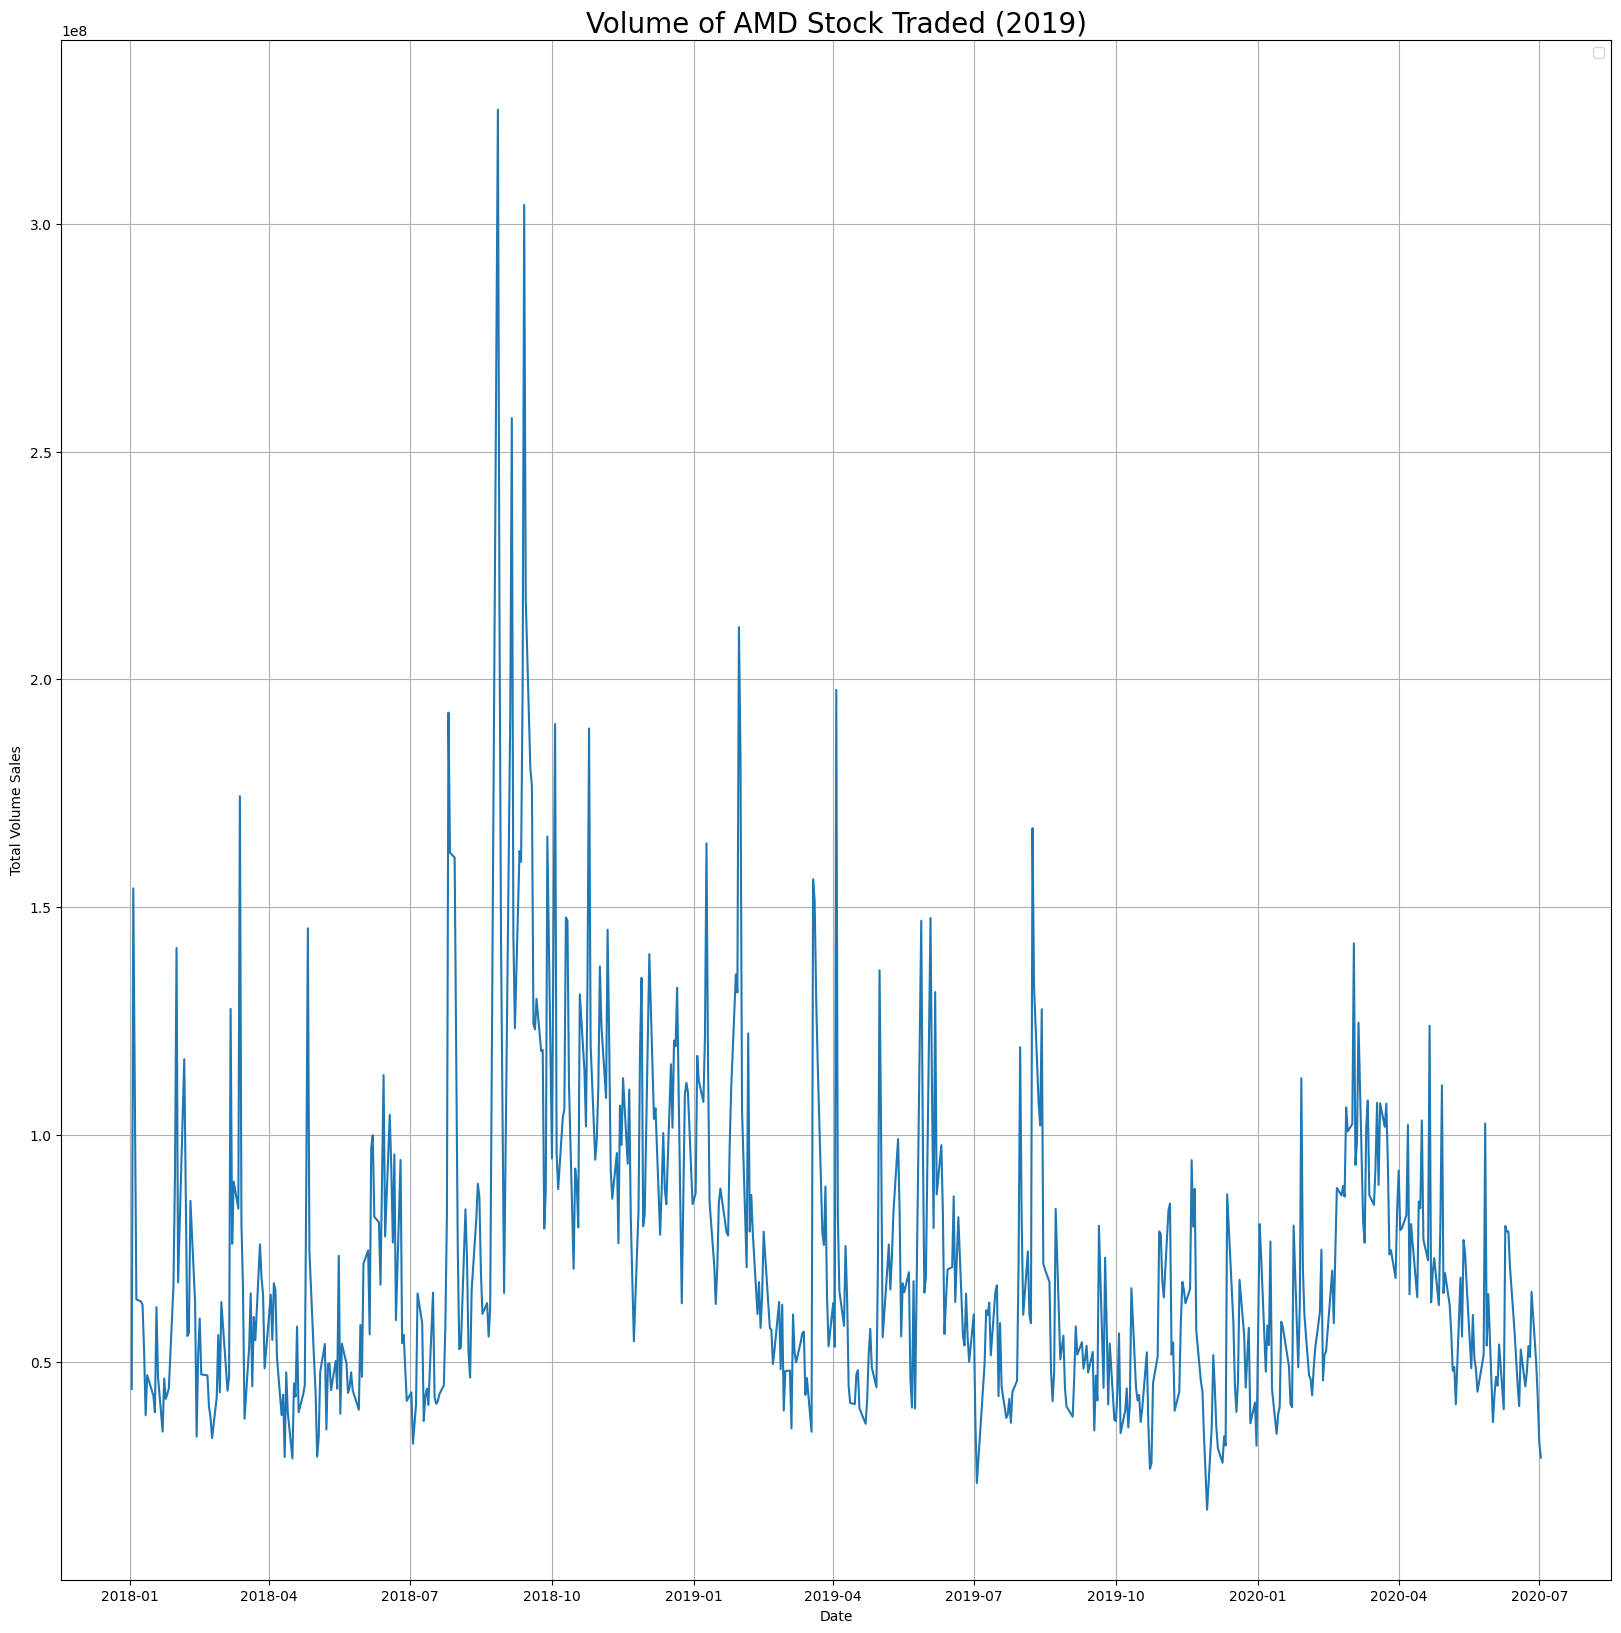

In [21]:
import matplotlib.pyplot as plt

# Converting date to datetime
df['date'] = pd.to_datetime(df['date'])

# Plotting the data
plt.title('Time Series')
plt.figure(figsize=(20, 20))
plt.plot(df['date'], df['volume'])

plt.title("Volume of AMD Stock Traded (2018 - 2020)", fontsize=20)
plt.xlabel("Date", fontsize=10)
plt.ylabel("Total Volume Sales", fontsize=10)

plt.grid(True)
plt.legend()
plt.show()

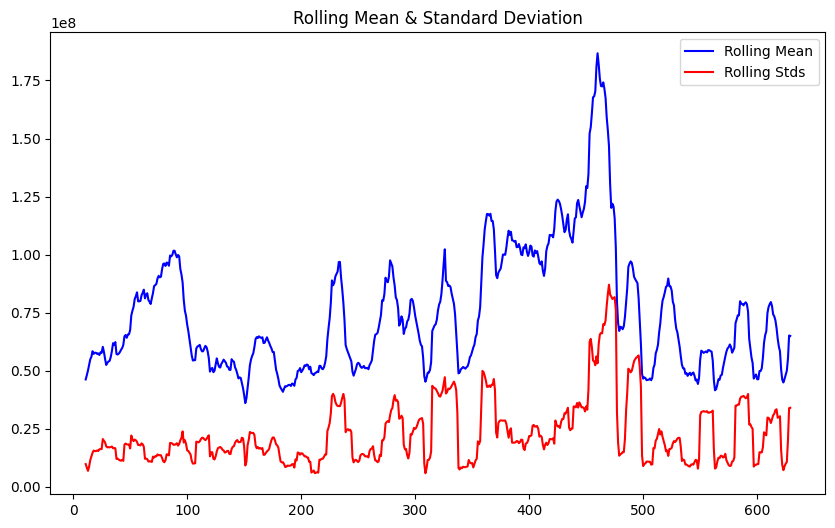

In [25]:
import numpy as np
# Rolling Statistics
rolling_means = df['volume'].rolling(window=12).mean()
rolling_stds = df['volume'].rolling(window=12).std()

colors = plt.cm.coolwarm(np.linspace(0, 1, len(rolling_means.keys())))

# Plotting rolling mean and std
plt.figure(figsize=(10, 6))
plt.plot(rolling_means, color='blue', label='Rolling Mean')
plt.plot(rolling_stds, color='red', label=f'Rolling Stds')
plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()


In [26]:
from statsmodels.tsa.stattools import adfuller, kpss

# Augmented Dickey-Fuller Test
adf_test = adfuller(df['volume'], autolag='AIC')
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

# KPSS Test
kpss_test = kpss(df['volume'], regression='c')
print(f'KPSS Statistic: {kpss_test[0]}')
print(f'p-value: {kpss_test[1]}')

ADF Statistic: -4.9447118654214215
p-value: 2.8519757703331683e-05
KPSS Statistic: 0.5572682295379952
p-value: 0.028768416770721807
